<a href="https://colab.research.google.com/github/tfrbf/Machine_Learning/blob/main/Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Data Prepration

In [27]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.rename(columns={'Outcome': 'Class'}, inplace=True)

In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Check Correlation

In [31]:
corr = df.corr()
corr['Class'].sort_values(ascending=False)

,Class
Class,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


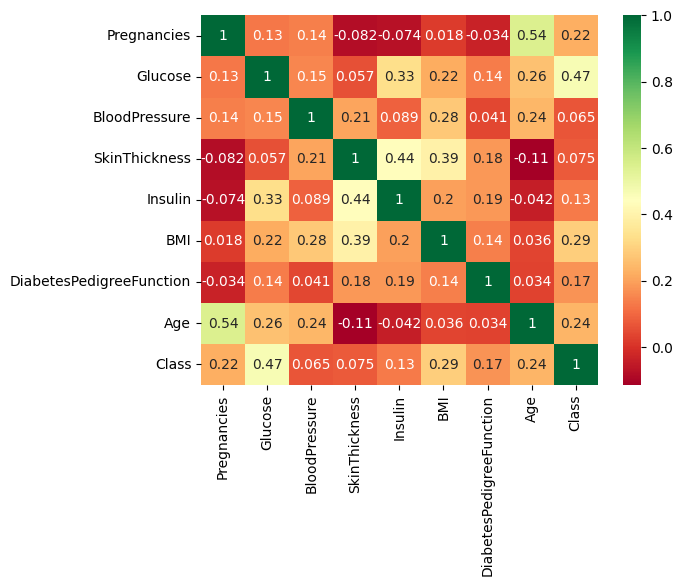

In [32]:
#plt.figure(figsize=(10,8))  # on this line I just set the size of figure to 12 by 10.
heatmap = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

# Test Train split

In [33]:
x = df.drop('Class', axis=1)
y = df['Class']

In [34]:
print(x[0:1])
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float)) # standardized
print(x[0:1])

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


# Creating model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

nghbrs = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)

yhat = nghbrs.predict(x_test)
print(yhat[0:5])

[1 0 0 0 0]


# Evaluation

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nghbrs.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7980456026058632
Test set Accuracy:  0.7597402597402597


# Find Best K

In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    nghbrs = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=nghbrs.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7012987 , 0.71428571, 0.74675325, 0.74025974, 0.74025974,
       0.72077922, 0.75974026, 0.75324675, 0.75324675])

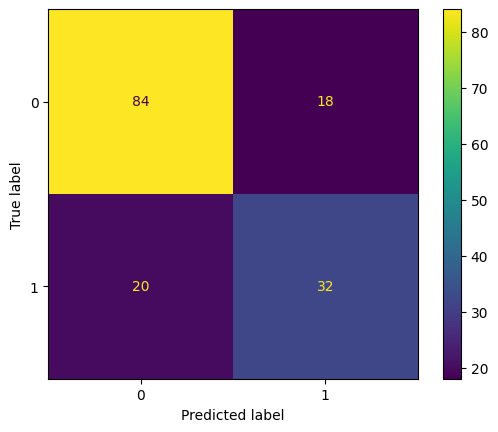

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, yhat)
plt.show()
#


In [40]:
recall = metrics.recall_score(y_test, yhat)
recall

0.6153846153846154

In [41]:
accuracy = metrics.accuracy_score(y_test, yhat)
accuracy

0.7532467532467533